In [1]:
import nltk
import pandas as pd
import io
import re
from string import punctuation
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import random
import matplotlib.pyplot as plt
#nltk.download('punkt')
#nltk.download('stopwords')
#nltk.download('PorterStemmer')

In [2]:
data = pd.read_csv('cleanerstill.csv', sep=";")
data.head()

/home/ronsholt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,age,body type,diet,drinks,drugs,education,essay0,essay4,essay6,essay7,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,strictly anything,socially,never,working on college university,about me i would love to think that i was so...,books absurdistan the republic of mice and ...,duality and humorous things,trying to find someone to hang out with i am ...,...,south san francisco california,doesnt have kids but might want them,straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35,average,mostly other,often,sometimes,working on space camp,i am a chef this is what that means 1 i am ...,i am die hard christopher moore fan i don't r...,,,...,oakland california,doesnt have kids but might want them,straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,english fluently spanish poorly french ...,single
2,38,thin,anything,socially,,graduated from masters program,i'm not ashamed of much but writing public te...,okay this is where the cultural matrix gets so...,,viewing listening dancing talking drinking...,...,san francisco california,,straight,has cats,,m,pisces but it doesnt matter,no,english french c,available
3,23,thin,vegetarian,socially,,working on college university,i work in a library and go to school,bataille celine beckett lynch jarmusch...,cats and german philosophy,,...,berkeley california,doesnt want kids,straight,likes cats,,m,pisces,no,english german poorly,single
4,29,athletic,,socially,never,graduated from college university,hey how's it going currently vague on the prof...,music bands rappers musicians at the moment...,,,...,san francisco california,,straight,likes dogs and likes cats,,m,aquarius,no,english,single


In [3]:
essay4 = [essay for essay in data["essay0"][:30000]]
words = []
all_words = []
essay_list = []
essay_lister = []
stop_words = stopwords.words('english')
porter = PorterStemmer()

ages = ['18-27','28-37','38-47','48-57','58+']
"""
def group_age(ages,age):
    if age < 28:
        return ages[0]
    elif age >= 28 and age < 38:
        return '28-37'
    elif age >= 38 and age < 48:
        return '38-47'
    elif age >= 48 and age < 58:
        return '48-57'
    else:
        return '58+'
"""
def group_age(ages,age):
    if age < 30:
        return '<30'
    elif age >= 30 and age < 40:
        return '30-39'
    else:
        return '40+'


for i, essay in enumerate(essay4):
    tmp = []
    tmp_list = []
    if type(essay) != float:
        splt = essay.split()
        words.extend(splt)
        tmp.extend([porter.stem(w) for w in splt if not w in stop_words])
        for w in tmp:
            if "'" in w:
                tmp_list.extend(w.split("'"))
            else:
                tmp_list.append(w)
        essay_list.append((group_age(ages,int(data["age"][i])),[word for word in tmp_list if word])) # set identifier

for word in words:
    if "'" in word:
        all_words.extend([w for w in word.split("'") if not w in stop_words])
    else:
        all_words.append(word)

In [4]:
clean_words = [w for w in all_words if not w in stop_words]
stemmed_words = [porter.stem(word) for word in clean_words]
freq_words = nltk.FreqDist(w for w in stemmed_words)
word_features = list(freq_words)[:2000]

In [5]:
def document_features(document):
    document_words = set(document)
    features = {}
    for word in word_features:
        features['contains({})'.format(word)] = (word in document_words)
    return features

featuresets = [(document_features(t), f) for (f, t) in essay_list if t]
random.shuffle(featuresets)
train_set, test_set = featuresets[100:], featuresets[:100]
classifier = nltk.NaiveBayesClassifier.train(train_set)

In [6]:
print(nltk.classify.accuracy(classifier, test_set))

0.53


In [7]:
classifier.show_most_informative_features(10)

Most Informative Features
         contains(retir) = True              40+ : <30    =     13.9 : 1.0
         contains(kindr) = True              40+ : <30    =     12.5 : 1.0
        contains(helper) = True              40+ : <30    =      9.2 : 1.0
          contains(1998) = True              40+ : <30    =      9.2 : 1.0
        contains(integr) = True              40+ : <30    =      9.1 : 1.0
         contains(marri) = True              40+ : <30    =      8.4 : 1.0
         contains(curvi) = True              40+ : <30    =      7.8 : 1.0
       contains(spiritu) = True              40+ : <30    =      7.8 : 1.0
     contains(affection) = True              40+ : <30    =      7.6 : 1.0
          contains(1990) = True              40+ : 30-39  =      7.6 : 1.0


[(1, 109), (1, 110), (31, 69), (59, 68), (66, 67), (105, 66), (109, 65), (113, 64), (138, 63), (167, 62), (176, 61), (195, 60), (197, 58), (221, 59), (252, 53), (256, 57), (265, 55), (267, 54), (271, 56), (309, 18), (344, 52), (350, 51), (437, 50), (459, 49), (481, 48), (529, 47), (578, 46), (611, 19), (643, 45), (708, 44), (858, 43), (953, 20), (980, 41), (1030, 40), (1072, 42), (1172, 39), (1282, 21), (1330, 38), (1427, 37), (1583, 36), (1755, 35), (1902, 34), (1934, 22), (2206, 33), (2587, 32), (2592, 23), (2735, 31), (3149, 30), (3242, 24), (3295, 29), (3531, 25), (3583, 28), (3685, 27), (3724, 26)]


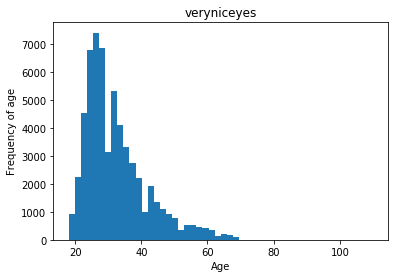

In [8]:
tmp = {}

for age in data['age']:
    if age not in tmp:
        tmp[age] = 1
    else:
        tmp[age] += 1
        
counts = []
for key,val in tmp.items():
    counts.append((val,key))
counts.sort()
print(counts)
x = [i[0] for i in counts]
y = [i[1] for i in counts]

plt.hist(data['age'],bins=50)
plt.title("veryniceyes")
plt.xlabel("Age")
plt.ylabel("Frequency of age")

plt.show()
